In [1]:
#import de tous les 
from base import *
import nltk
from nltk.corpus import stopwords #mots vides
from nltk.tokenize import word_tokenize #découpage des phrases en tokens
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd #Obligé de passer par là pour pas avoir des dates en score
import pyspark.sql.functions as f
df={} #DF Par note
motsParNote={} #Tous les mots associés à une note


In [3]:
#Préparation des dataframes
data = pd.read_csv('../csv/olist_order_reviews_dataset.csv')
data['review_comment_message'] = data['review_comment_message'].astype(str)
data['review_comment_title'] = data['review_comment_title'].astype(str)
reviews = sqlContext.createDataFrame(data) #overwrite du review de base whatever


In [4]:
#Création des stop words
stop_words =nltk.corpus.stopwords.words('portuguese')
#on rajoute quelques mots qui ne servent à rien comme produto
newStopWords = ['produto','nan']
stop_words.extend(newStopWords)
"""
Pour être mieux il faudrait:
faire du stemming
supprimer les accents
supprimer d'autres mots
"""

"\nPour être mieux il faudrait:\nfaire du stemming\nsupprimer les accents\nsupprimer d'autres mots\n"

In [5]:
#Nombre de reviews pour chaque note
toutesReviews = reviews.select("review_score","review_comment_message").dropna().groupBy("review_score").count().show()

+------------+-----+
|review_score|count|
+------------+-----+
|           5|57420|
|           1|11858|
|           3| 8287|
|           2| 3235|
|           4|19200|
+------------+-----+



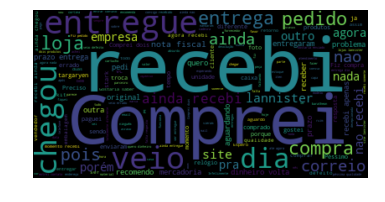

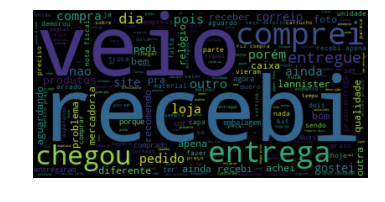

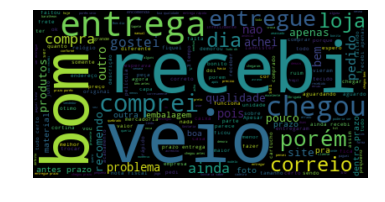

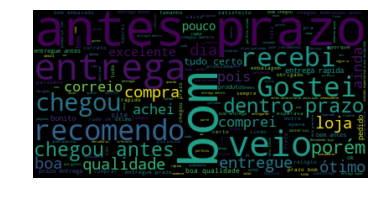

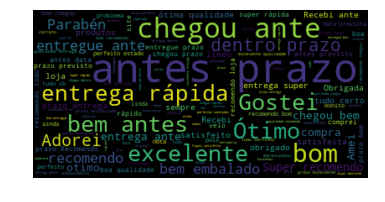

In [6]:
for x in range (1,6):
    df[x] = reviews.where(reviews.review_score == x).selectExpr("review_comment_message as message").dropna()
    df[x] = df[x].withColumn("Longueur",length(col("message"))) #longueur du message
    df[x] = df[x].withColumn("mots",f.explode(f.split(f.col("message"),' '))).groupBy("mots").count().sort('count', ascending=False)
    #df[x].agg(avg(col("Longueur"))).show() #moyenne du nb de mots
    #On voit que plus les utilisateurs mettent une mauvaise notes, plus longs sont leurs messages (car ils sont énervés)
    #Compter le top nb de mots
    
    #Ts les mots de la note
    motTmp=""
    for iteration in reviews.where(reviews.review_score == x).select("review_comment_message").collect(): 
        motTmp += iteration.review_comment_message+" "
    motsParNote[x]=motTmp
    
    wordcloud = WordCloud(stopwords=stop_words).generate(motTmp)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


In [ ]:
#Pour toutes les notes on prend les mots qui reviennent le plus souvent
for x in range (1,6):
    df[x].show()